In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43 # predefined
cur_path = os.getcwd()
# print(cur_path)

In [5]:
#Getting images and labels 
for i in range(classes):
    path = os.path.join(cur_path,'Dataset/Train',str(i)) #Each class folder is it's class number
    images = os.listdir(path)

    for img in images:
        try:
            image = Image.open(path + '\\'+ img)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [6]:
#Converting data/label into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


Number of images: 39209 <br>
Size of images: 30x30<br>
Channels in each image: 3 (RGB)

In [10]:
#80-20 split(train and test) of dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
#One hot encoding of labels
y_train = to_categorical(y_train, 43) #43 classes
y_test = to_categorical(y_test, 43)

In [12]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.10))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [16]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs = 15
history=model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 67s 137ms/step - loss: 2.3370 - accuracy: 0.4203 - val_loss: 0.6120 - val_accuracy: 0.8488
Epoch 2/15
491/491 [==============================] - 73s 150ms/step - loss: 0.9406 - accuracy: 0.7364 - val_loss: 0.3591 - val_accuracy: 0.9008
Epoch 3/15
491/491 [==============================] - 72s 147ms/step - loss: 0.6823 - accuracy: 0.8016 - val_loss: 0.2843 - val_accuracy: 0.9239
Epoch 4/15
491/491 [==============================] - 74s 150ms/step - loss: 0.5570 - accuracy: 0.8350 - val_loss: 0.1965 - val_accuracy: 0.9448
Epoch 5/15
491/491 [==============================] - 71s 145ms/step - loss: 0.4828 - accuracy: 0.8572 - val_loss: 0.1889 - val_accuracy: 0.9484
Epoch 6/15
491/491 [==============================] - 74s 151ms/step - loss: 0.4441 - accuracy: 0.8688 - val_loss: 0.1505 - val_accuracy: 0.9597
Epoch 7/15
491/491 [==============================] - 76s 154ms/step - loss: 0.3920 - accuracy: 0.8824 - val_loss: 0.1256 - val_ac

{'loss': [2.3369932174682617, 0.9405860304832458, 0.6823348999023438, 0.5569834113121033, 0.4827702045440674, 0.44412949681282043, 0.3920170068740845, 0.39189738035202026, 0.36851102113723755, 0.35117000341415405, 0.33016353845596313, 0.31833645701408386, 0.3070366084575653, 0.31096598505973816, 0.28168627619743347], 'accuracy': [0.42031434178352356, 0.7364427447319031, 0.8016067743301392, 0.8350176811218262, 0.8572384715080261, 0.8688430786132812, 0.8823604583740234, 0.8839863538742065, 0.8919883966445923, 0.896738588809967, 0.9011062383651733, 0.904900074005127, 0.909586489200592, 0.9090445637702942, 0.9151656031608582], 'val_loss': [0.6119849681854248, 0.35909488797187805, 0.28428319096565247, 0.19653400778770447, 0.1888669729232788, 0.15053176879882812, 0.12564435601234436, 0.11199486255645752, 0.12787185609340668, 0.11324545741081238, 0.1052795872092247, 0.10851621627807617, 0.10699890553951263, 0.08593972027301788, 0.0887444019317627], 'val_accuracy': [0.8487630486488342, 0.90079

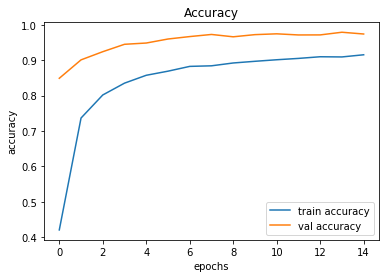

In [27]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

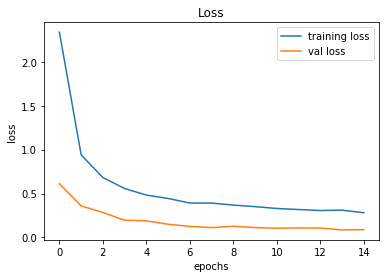

In [19]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
# model.save("traffic_sign_detector_model.h5") save as h5 file

In [23]:
#testing accuracy on test dataset
y_test = pd.read_csv('Test.csv') #csv file contains test images path and class labels

labels = y_test["ClassId"].values
images = y_test["Path"].values

data=[]

for img in images:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

In [16]:
# model=load_model("traffic_sign_detector_model.h5")

In [24]:
pred = model.predict_classes(X_test)
#Comparing with ground truth to get accuracy
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9360253365003959
